In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly as pl 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer, MissingIndicator

## Binning

In [3]:
data = {'age': [5, 15, 25, 35, 45, 55, 65, 75]}
df = pd.DataFrame(data)

# Define custom bin edges and labels
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

# Perform custom binning
df["life_stages"] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)
df

,age,life_stages
0,5,Child
1,15,Teen
2,25,Young Adult
3,35,Young Adult
4,45,Adult
5,55,Adult
6,65,Senior
7,75,Senior


In [4]:
# use statistics for binning like quantile(4 equal parts)
df["age_bin"] = pd.qcut(df["age"], q = 4)
df

,age,life_stages,age_bin
0,5,Child,"(4.999, 22.5]"
1,15,Teen,"(4.999, 22.5]"
2,25,Young Adult,"(22.5, 40.0]"
3,35,Young Adult,"(22.5, 40.0]"
4,45,Adult,"(40.0, 57.5]"
5,55,Adult,"(40.0, 57.5]"
6,65,Senior,"(57.5, 75.0]"
7,75,Senior,"(57.5, 75.0]"


#### Binarization for Categorical Data

In [5]:
data = {'color': ['red', 'blue', 'green', 'blue', 'red']}
df = pd.DataFrame(data)
df_binarized = pd.get_dummies(df, columns=["color"])        # Perform one-hot encoding
df_binarized

,color_blue,color_green,color_red
0,False,False,True
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,True


In [6]:
# Binarization with Multiple Thresholds

data = {'income': [25000, 50000, 75000, 100000]}
df = pd.DataFrame(data)

thresholds = [30000, 60000, 90000]
for threshhold in thresholds:
    df[f"income_above{threshhold}"] = (df["income"] > threshhold).astype(int)
    
df

,income,income_above30000,income_above60000,income_above90000
0,25000,0,0,0
1,50000,1,0,0
2,75000,1,1,0
3,100000,1,1,1


## Example

In [ ]:
## Types of Descritization (Binning)
# 1: Unsupervised Binning (Equal width(uniform) -> Formula: max-min/bins, Equal frequencey binning -> each interval contain equal number of observation, 
# k-means binning-> make clusters )  
# 2: Supervised Binning (Decision Tree binning)
# 3: Custom Binning


# We use KBinDiscritizer() parameter -> 1: no. of bins 2: strategy -(uniform, quntile, k-means) 3: encoding(ordinal or ohe)

In [7]:
data = sns.load_dataset("titanic")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
data_columns = data[["age", "fare", "survived"]]
data_columns.dropna(inplace=True)
# data_columns.shape
data_columns.sample(5)

C:\Users\Abdullah khan\AppData\Local\Temp\ipykernel_16356\874369850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_columns.dropna(inplace=True)


,age,fare,survived
645,48.0,76.7292,1
737,35.0,512.3292,1
190,32.0,13.0000,1
722,34.0,13.0000,0
452,30.0,27.7500,0


In [17]:
from sklearn.preprocessing import KBinsDiscretizer
kbin_age = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="uniform")
kbin_fare = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="uniform")
kbin_age.fit(data_columns[["age"]])
kbin_fare.fit(data_columns[["fare"]])
kbin_age.bin_edges_, kbin_fare.bin_edges_

(array([array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
               64.084, 72.042, 80.   ])                                       ],
       dtype=object),
 array([array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
               307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ])          ],
       dtype=object))

In [28]:
from sklearn.preprocessing import KBinsDiscretizer
kbin_age = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile") # Orninal to OneHotEncoding
kbin_fare = KBinsDiscretizer(n_bins=10, encode="onehot", strategy="uniform")
kbin_age.fit(data_columns[["age"]])
kbin_fare.fit(data_columns[["fare"]])
kbin_age.bin_edges_, kbin_fare.bin_edges_
kbin_age.transform(data_columns[["age"]])
kbin_fare.transform(data_columns[["fare"]])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 714 stored elements and shape (714, 10)>

## Impute missing data

In [32]:
# Handling missing numerical values
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
data["family"] = data["sibsp"] + data["parch"]
data.sample(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
753,0,3,male,23.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True,0
183,1,2,male,1.0,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False,3
57,0,3,male,28.5,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
 15  family       891 non-null    int64   
dtypes: bool(2), category(2), float64(2), int64(5), object(5)
memory usage: 87.6+ KB


In [38]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
family           0
dtype: int64

In [45]:
df = data[["age","fare","family","survived"]]
X = df.drop(columns="survived")
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
mean_age = X_train["age"].mean()
median_age = X_train["age"].median()

X_train["age_mean"] = X_train["age"].fillna(mean_age)
X_train["age_median"] = X_train["age"].fillna(median_age)

In [47]:
X_train.sample(3)

,age,fare,family,age_mean,age_median
691,4.0,13.4167,1,4.000000,4.0
205,2.0,10.4625,1,2.000000,2.0
602,NaN,42.4000,0,29.498846,28.0


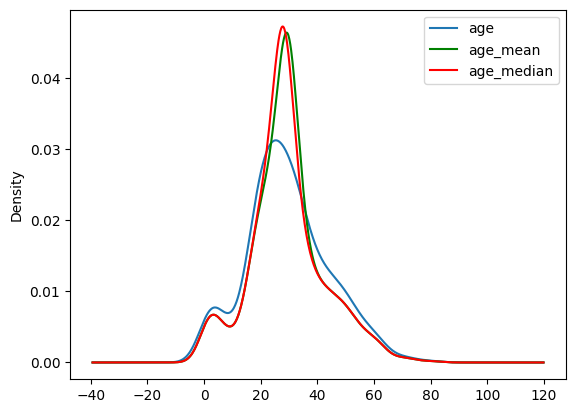

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['age'].plot(kind='kde', ax=ax)

# variable imputed with the mean
X_train['age_mean'].plot(kind='kde', ax=ax, color='green')

# variable imputed with the median
X_train['age_median'].plot(kind='kde', ax=ax, color='red')


# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [49]:
X_train.cov()
# X_train.corr()

,age,fare,family,age_mean,age_median
age,210.251707,71.580633,-6.993325,210.251707,210.251707
fare,71.580633,2700.831981,18.495747,57.485994,61.261919
family,-6.993325,18.495747,2.830892,-5.616299,-5.587710
age_mean,210.251707,57.485994,-5.616299,168.851934,168.851934
age_median,210.251707,61.261919,-5.587710,168.851934,169.207310


<Axes: >

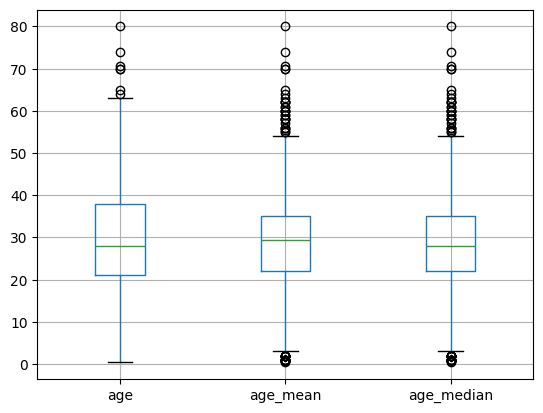

In [50]:
X_train_bx = X_train[["age","age_mean","age_median"]]
X_train_bx.boxplot()

In [51]:
# With Sklearn 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer1 = SimpleImputer(strategy="mean")
imputer2 = SimpleImputer(strategy="median")

In [52]:
trf = ColumnTransformer([
    ("Imputer_1",imputer1,["age"]),
    ("Imputer_2",imputer2,["age"])
],remainder="passthrough")
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('Imputer_1', SimpleImputer(), ['age']),
                                ('Imputer_2', SimpleImputer(strategy='median'),
                                 ['age'])])

In [53]:
trf.fit(X_train)

C:\Users\Abdullah khan\AppData\Roaming\Python\Python310\site-packages\sklearn\compose\_column_transformer.py:1651: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('Imputer_1', SimpleImputer(), ['age']),
                                ('Imputer_2', SimpleImputer(strategy='median'),
                                 ['age'])])

In [56]:
trf.named_transformers_["Imputer_1"].statistics_, trf.named_transformers_["Imputer_2"].statistics_

(array([29.49884615]), array([28.]))

### There are two more techniques findout by yourself
# Handling categorical missing data

##### Most Frequent value imputation (when you have lot of categores: you replace with frequent one)
##### Missing category imputation (when you have few categores: you create new category 'missing')

In [64]:
data = {'group': ['A', 'A', 'B', 'B', 'A'], 'value': [10, None, 20, None, 30]}
df = pd.DataFrame(data)

# Impute missing values with group-specific means
df['value'] = df.groupby('group')['value'].transform(lambda x: x.fillna(x.mean()))
print(df)

  group  value
0     A   10.0
1     A   20.0
2     B   20.0
3     B   20.0
4     A   30.0


In [66]:
data = pd.read_csv("D:\\Machine learning\\DataSets\\train.csv", usecols=['GarageQual','FireplaceQu','SalePrice'])
data.sample(3)

,FireplaceQu,GarageQual,SalePrice
294,Gd,TA,167000
1095,Gd,TA,176432
1035,NaN,TA,84000


In [67]:
data.isnull().mean() * 100      # Percentage of how many values are missing

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

<Axes: xlabel='GarageQual'>

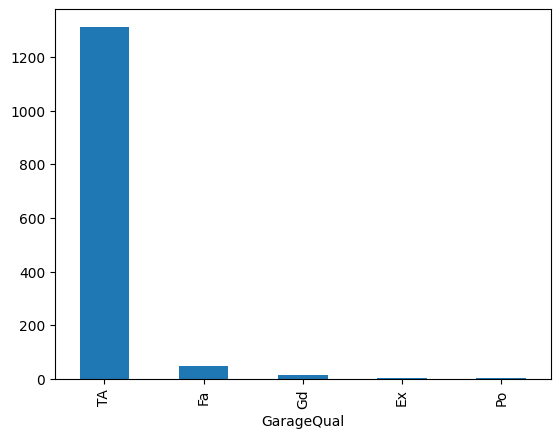

In [69]:
data["GarageQual"].value_counts()
data["GarageQual"].value_counts().plot(kind="bar")

In [71]:
data["GarageQual"].mode()[0]

'TA'

Text(0.5, 1.0, 'GarageQual')

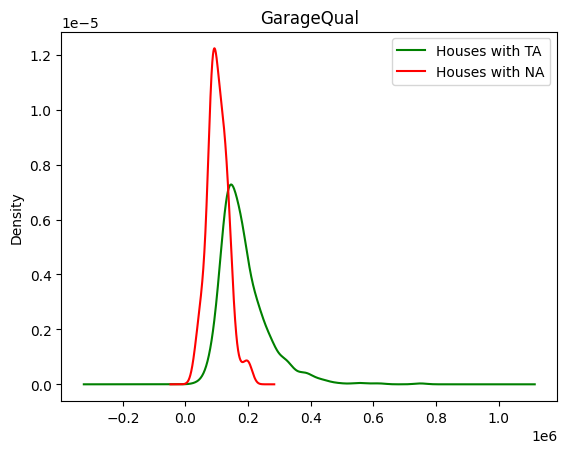

In [72]:
# Let's replace missing values with mode

fig = plt.figure()
ax = fig.add_subplot(111)
data[data["GarageQual"] == "TA"]["SalePrice"].plot(kind="kde", ax=ax, color="green")
data[data["GarageQual"].isnull()]["SalePrice"].plot(kind="kde", ax=ax, color="red")

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

<Axes: xlabel='GarageQual'>

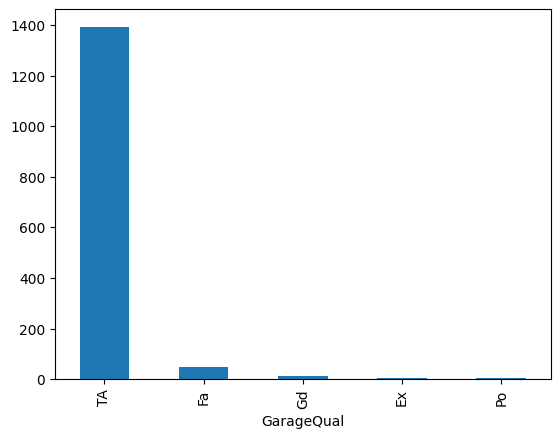

In [73]:
temp = data[data["GarageQual"] == "TA"]["SalePrice"]
data["GarageQual"].fillna("TA", inplace=True)
# Now again plot the graph (After filling missing values)
data["GarageQual"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'GarageQual')

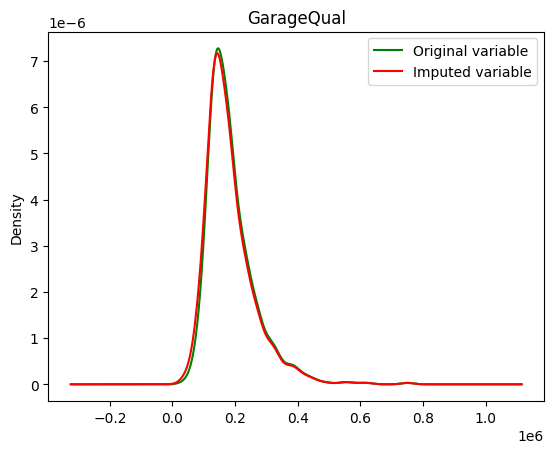

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax, color= "green")
data[data['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')
plt.title('GarageQual')

<Axes: xlabel='FireplaceQu'>

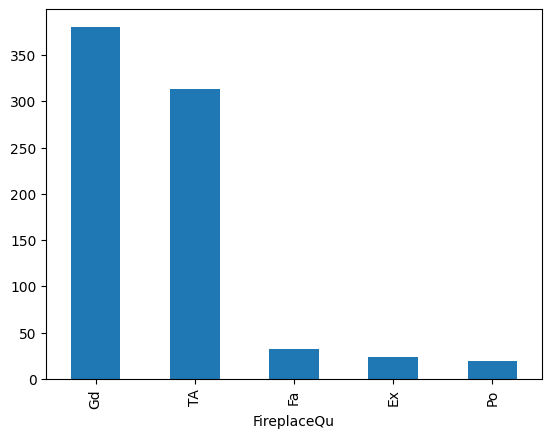

In [77]:
data["FireplaceQu"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'FireplaceQu')

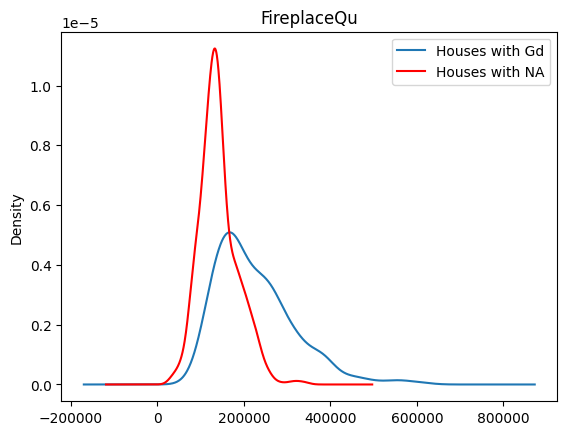

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)

data[data['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

data[data['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

C:\Users\Abdullah khan\AppData\Local\Temp\ipykernel_16356\2788899720.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['FireplaceQu'].fillna('Gd', inplace=True)


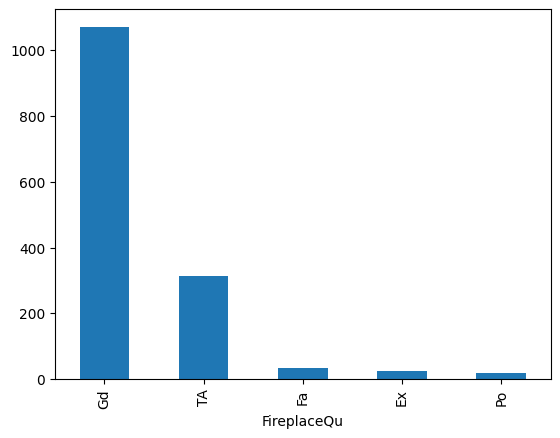

In [80]:
# Let's replece missing values with mode
# data['FireplaceQu'].mode()[0]
temp = data[data['FireplaceQu']=='Gd']['SalePrice']
data['FireplaceQu'].fillna('Gd', inplace=True)
data['FireplaceQu'].value_counts().plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'FireplaceQu')

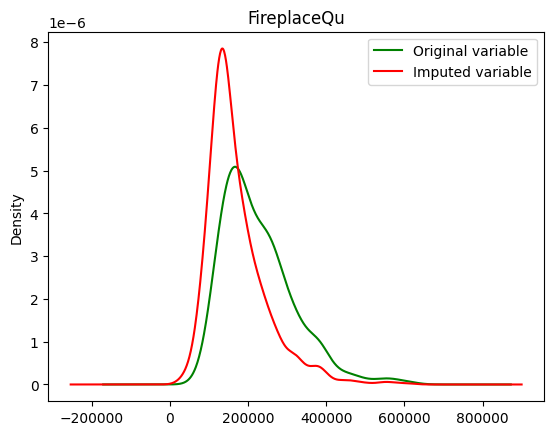

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde', ax=ax, color= "green")
data[data['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')
plt.title('FireplaceQu')

In [ ]:
# Let's do this with the help of sklearn
X_train,X_test,y_train,y_test = train_test_split(data.drop(columns=['SalePrice']),data['SalePrice'],test_size=0.2)

In [83]:
imputer = SimpleImputer(strategy='most_frequent')

In [84]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Abdullah khan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [85]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)